# **Fancies Classification Problem**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Facies Data.csv to Facies Data.csv


In [4]:
#Import the data and print descriptive statistics
import pandas as pd
import seaborn as sns
dataset=pd.read_csv('Facies Data.csv')
print(dataset.describe())
x=dataset.iloc[:,4:11]
y=dataset.iloc[:,0].values
#Scale the input data from 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
xnorm=pd.DataFrame(data=sc.fit_transform(x))
#Partition the data into train and test
from sklearn.model_selection import train_test_split
seed=50
x_train, x_test, y_train, y_test=train_test_split(xnorm, y, 
random_state=1)

  
#Import logistic regression and train the model
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression(max_iter=200).fit(x_train,y_train)
y_predict=LG.predict(x_test)

            Facies        Depth  ...         NM_M       RELPOS
count  3232.000000  3232.000000  ...  3232.000000  3232.000000
mean      4.422030  2875.824567  ...     1.498453     0.520287
std       2.504243   131.006274  ...     0.500075     0.286792
min       1.000000  2573.500000  ...     1.000000     0.010000
25%       2.000000  2791.000000  ...     1.000000     0.273000
50%       4.000000  2893.500000  ...     1.000000     0.526000
75%       6.000000  2980.000000  ...     2.000000     0.767250
max       9.000000  3122.500000  ...     2.000000     1.000000

[8 rows x 9 columns]


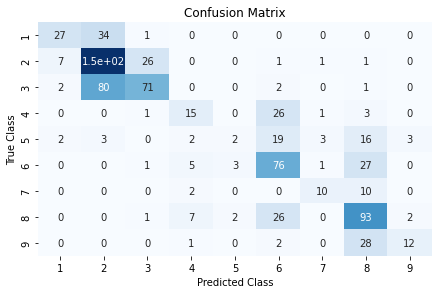

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_predict)
cv=np.arange(1,10)
dataframe=pd.DataFrame(matrix,index=cv,columns=cv)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [6]:
from sklearn.metrics import classification_report
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           1       0.71      0.44      0.54        62
           2       0.56      0.81      0.66       185
           3       0.70      0.46      0.55       156
           4       0.47      0.33      0.38        46
           5       0.29      0.04      0.07        50
           6       0.50      0.67      0.57       113
           7       0.62      0.45      0.53        22
           8       0.52      0.71      0.60       131
           9       0.71      0.28      0.40        43

    accuracy                           0.56       808
   macro avg       0.56      0.46      0.48       808
weighted avg       0.57      0.56      0.54       808



In [7]:
from sklearn.model_selection import cross_val_score
scores_kfold=cross_val_score(LG, xnorm, y,cv=5)
print("Kfold Cross-validation scores: {}". format(scores_kfold))
print("Average Kfold cross-validation score: {}". format(
scores_kfold.mean()))

Kfold Cross-validation scores: [0.52704791 0.53323029 0.48916409 0.48297214 0.57275542]
Average Kfold cross-validation score: 0.5210339695953221


In [8]:
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
scores_loo=cross_val_score(LG, xnorm, y, cv=loo)
print(" Number of cv iterations-Leave one Out: ", len(scores_loo))
print(" Mean accuracy Leave one Out: {}". format(scores_loo.mean()))

 Number of cv iterations-Leave one Out:  3232
 Mean accuracy Leave one Out: 0.5590965346534653


In [9]:
from sklearn.model_selection import ShuffleSplit
sh_sp=ShuffleSplit(test_size =.25, train_size =.75, n_splits = 6,random_state=50)
scores_SP=cross_val_score(LG, xnorm, y, cv=sh_sp)
print(" Cross-validation scores:{}". format(scores_SP))
print(" Mean accuracy: {}". format(scores_SP.mean()))

 Cross-validation scores:[0.54455446 0.56064356 0.5779703  0.54455446 0.55321782 0.57549505]
 Mean accuracy: 0.5594059405940595


In [10]:
from sklearn.model_selection import GridSearchCV
penalty=['l1','l2']
C=np.logspace(0,4,20)
LRG=LogisticRegression(multi_class='auto',solver='liblinear',max_iter=200)
hyperparameters=dict(C=C,penalty=penalty)
gridsearch=GridSearchCV(LRG,hyperparameters, cv=5, verbose=0)
Best_Model=gridsearch.fit(xnorm, y)
print('Best penalty:', Best_Model.best_estimator_.get_params()
['penalty'])
print('Best C:', Best_Model.best_estimator_.get_params()['C'])
B=Best_Model.predict(x_test) 
from sklearn.metrics import classification_report

print(classification_report(y_test, B))

Best penalty: l2
Best C: 48.32930238571752
              precision    recall  f1-score   support

           1       0.60      0.58      0.59        62
           2       0.59      0.68      0.63       185
           3       0.66      0.56      0.60       156
           4       0.56      0.48      0.52        46
           5       0.33      0.08      0.13        50
           6       0.53      0.67      0.59       113
           7       0.44      0.50      0.47        22
           8       0.58      0.66      0.62       131
           9       0.79      0.63      0.70        43

    accuracy                           0.59       808
   macro avg       0.57      0.54      0.54       808
weighted avg       0.58      0.59      0.58       808



In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
np.random.seed(50)
pipe = Pipeline([("clf", LogisticRegression(solver='liblinear',max_iter=200))])

log_classifier = {"clf": [LogisticRegression(solver='liblinear',max_iter=200)],
                 "clf__penalty": ['l1', 'l2'],
                 "clf__C": np.arange(0.1, 100, 20)}

ranforest_classifier = {"clf": [RandomForestClassifier(random_state=0)],
                        "clf__n_estimators": np.arange(10, 300, 10),
                        "clf__max_features": [1, 2, 3]}

grid = [ranforest_classifier,log_classifier]

gridsearch_models = GridSearchCV(pipe, grid, cv=5, verbose=0,n_jobs=-1)
Best_modelM = gridsearch_models.fit(x_train, y_train)

print(Best_modelM.best_estimator_.get_params()["clf"])
y_BM=Best_modelM.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_BM))

RandomForestClassifier(max_features=2, n_estimators=80, random_state=0)
              precision    recall  f1-score   support

           1       0.81      0.71      0.76        62
           2       0.71      0.78      0.74       185
           3       0.75      0.73      0.74       156
           4       0.79      0.72      0.75        46
           5       0.64      0.42      0.51        50
           6       0.70      0.77      0.73       113
           7       0.68      0.77      0.72        22
           8       0.75      0.76      0.76       131
           9       0.95      0.91      0.93        43

    accuracy                           0.74       808
   macro avg       0.75      0.73      0.74       808
weighted avg       0.74      0.74      0.74       808

